In [1]:
import glob
import os

import h5py
import numpy as np
import SimpleITK as sitk

In [2]:
os.chdir('..')

In [3]:
slice_num = 0
mask_path = sorted(glob.glob("data/mri/*.nii"))
case = mask_path[0]
img_itk = sitk.ReadImage(case)
origin = img_itk.GetOrigin()
spacing = img_itk.GetSpacing()
direction = img_itk.GetDirection()
image = sitk.GetArrayFromImage(img_itk)
origin, spacing, direction, image.shape

((0.0, 0.0, 0.0),
 (1.0, 1.0, 1.0),
 (1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0),
 (181, 217, 181))

- h5py文件是存放两类对象的容器，数据集(dataset)和组(group)
- dataset类似数组类的数据集合，和numpy的数组差不多。
- group是像文件夹一样的容器，它好比python中的字典，有键(key)和值(value)。
- group中可以存放dataset或者其他的group。”键”就是组成员的名称，”值”就是组成员对象本身(组或者数据集)

In [4]:
f = h5py.File('data/aslice.h5', 'w') # 创建文件
f.create_dataset('image', data=image[35], compression="gzip") # 在文件中保存numpy数组，键值为image
f.create_dataset('label', data=image[56], compression="gzip") # 在文件中保存numpy数组，键值为label
f.close()

In [7]:
h5f = h5py.File('data/aslice.h5', "r")
image = h5f["image"][:]
label = h5f["label"][:]
sample = {"image": image, "label": label}
h5f.close()
image, label

(array([[ 0.,  0.,  0., ...,  0., -0.,  0.],
        [-0., -0., -0., ..., -0., -0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32),
 array([[-0.,  0., -0., ...,  0.,  0.,  0.],
        [ 0., -0.,  0., ...,  0.,  0.,  0.],
        [-0.,  0., -0., ...,  0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32))

In [ ]:
image.shape

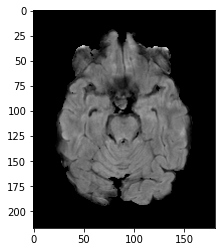

In [9]:
import matplotlib.pyplot as plt
plt.imshow(label, cmap='gray')

In [10]:
f = h5py.File('a.h5', 'w')
g = f.create_group('gundam')
g.create_dataset('strike', data=np.arange(3, 12))
g.create_dataset('freedom', data=np.arange(23, 31))
f.close()

In [29]:
f = h5py.File('a.h5', 'r')
arr = f['/gundam/freedom']
arr = f['gundam']
f.name

'/'